# Pràctica 1
## Pandas

### Pregunta 1) Importació del Dataset

1 - Explicació del context. Què son aquestes dades? Posar referències.
Dataset: https://healthdata.gov/Health/COVID-19-Public-Therapeutic-Locator/rxn6-qnx8

Instrucció prèvia per reduir tamany del CSV, filtrem per les localitzacions a Nova York (State Code = "NY").

cat COVID-19_Public_Therapeutic_Locator.csv | cut -d ',' -f 7 | grep -E ',NY,' COVID-19_Public_Therapeutic_Locator.csv > NY_COVID-19_Public_Therapeutic_Locator.csv


#### Explicació dataset.

Es tracta d'un dataset amb les ubicacions de terapèutiques COVID-19 disponibles públicament. El conjunt de dades només inclou les ubicacions dels terapèutics de Evusheld (anticossos monoclonals), Molnupiravir (antiviral) i Paxlovid (antiviral). En data 2/18/2022 - s'han afegit nous terapèutics, Bebtelovimab & Sotrovimab. La terapèutica COVID-19 requereix una recepta per obtenir-la.

2 - Explicar les columnes que usareu (no cal totes).
    
    a) Nom
      - Provider Name	    
    b) Tipus (string, categorical, data, número enter, decimal ...)
      - string 
    c) Per a què serveix, si no queda clar amb el nom.
      - Nom del proveïdor

    a) Nom
      - Address1	    
    b) Tipus (string, categorical, data, número enter, decimal ...)
      - string 
    c) Per a què serveix, si no queda clar amb el nom.
      - Adreça

    a) Nom
      - Order Label	    
    b) Tipus (string, categorical, data, número enter, decimal ...)
      - Categorical
    c) Per a què serveix, si no queda clar amb el nom.
      - Tractament que ofereix

    a) Nom
      - National Drug Code
    b) Tipus (string, categorical, data, número enter, decimal ...)
      - Text, String
    c) Per a què serveix, si no queda clar amb el nom.
      - Codi National del terapèutic

    a) Nom
      - Corses Available
    b) Tipus (string, categorical, data, número enter, decimal ...)
      - Number, int
    c) Per a què serveix, si no queda clar amb el nom.
      - Total de cursos que queden a l'inventari disponible en aquest lloc del proveïdor

3 - Quantes files hi ha?

- 5595 files, 15 columnes.

4 - Hi ha NAs? A on?

  - Sí n'hi han, sobretot a les columnes "Address2" i "Provider Note".

#### Carregat CSV en un dataframe:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Q1 - Llegim el CSV.
csv_file_path = './NY_COVID-19_Public_Therapeutic_Locator.csv'
df_data: pd.DataFrame = pd.read_csv(csv_file_path, sep=",", parse_dates=['Last Report Date'], dayfirst=True )
display(df_data)

,Provider Name,Address1,Address2,City,County,State Code,Zip,National Drug Code,Order Label,Courses Available,Geocoded Address,NPI,Last Report Date,Provider Status,Provider Note
0,Avalon Pharmacy,7 Second Ave,NaN,New York,New York,NY,10003,00069-1085-30,Paxlovid,52.0,POINT (-73.9913 40.72403),1.629306e+09,2022-04-10,ACTIVE,NaN
1,PLUS DRUGS INC,209-31 Northern Blvd,NaN,Bayside,Queens,NY,11361,00069-1085-30,Paxlovid,29.0,POINT (-73.77338 40.75943),1.861843e+09,2022-10-14,ACTIVE,NaN
2,ACME,3101 ROUTE 22,NaN,Patterson,Putnam,NY,12563,00069-1085-30,Paxlovid,6.0,POINT (-73.591667 41.51687),1.376900e+09,2022-10-16,ACTIVE,NaN
3,TAP RX,111 EXECUTIVE BLVD,NaN,Farmingdale,Nassau,NY,11735,00069-1085-30,Paxlovid,121.0,POINT (-73.428406 40.72173),1.710006e+09,2022-10-14,ACTIVE,NaN
4,Rite Aid 10804,12983 MAIN ROAD,NaN,Akron,Erie,NY,14001,00069-1085-30,Paxlovid,41.0,POINT (-78.50282 42.99713),1.851490e+09,2022-10-13,ACTIVE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,WALGREENS STORE #14327,1675 3RD AVE,NaN,New York,New York,NY,10128,00006-5055-06,Lagevrio (molnupiravir),23.0,POINT (-73.95038 40.78341),1.497772e+09,2022-10-13,ACTIVE,NaN
5590,CVS Store #07032,450 MAIN STREET,CVS Pharmacy,Armonk,Westchester,NY,10504,00006-5055-06,Lagevrio (molnupiravir),51.0,POINT (-73.712652 41.12754),1.942619e+09,2022-10-14,ACTIVE,NaN
5591,CVS Store #02438,282 EAST 149TH STREET,CVS Pharmacy,Bronx,Bronx,NY,10451,00006-5055-06,Lagevrio (molnupiravir),13.0,POINT (-73.922245 40.816965),1.588768e+09,2022-10-14,ACTIVE,NaN
5592,Stop and Shop Store # 2581,156-01 CROSSBAY BLVD,NaN,Howard Beach,Queens,NY,11414,00006-5055-06,Lagevrio (molnupiravir),48.0,POINT (-73.84033 40.66281),1.063882e+09,2022-10-13,ACTIVE,NaN


### Pregunta 2 - Arreglant el dataset.

- Format Tidy

1. El dataset està en format «tidy»? Justifiqueu la vostra resposta.
2. Si no ho està, poseu-lo en aquest format utilitzant Pandas.


Format Tidy:

1 - Cada fila és una observació.
    Sí, es una observació a partir de les dates de "Last Report Date".
    
2 - Cada columna és una variable.
    Sí, cada columna és una i només una variable.

3 - Cada cel·la conté només una dada.
    En gairebé tots els caso sí, exepte el "Last Report Date", que conté la data i l'hora.


Com ho hem fet per solucionar-ho?

Gràcies al parametre parse dates, hem aconseguit arreglar la data i ja no apareix la hora, ja que era informació irrellevant.
Ará sí que compleix el format Tidy, ja que cada cel·la es una variable, conté només una dada i una observació.

També hem eliminat la columna "Address 2", ja que és una informació irrellevant.

In [2]:
# Còpia del dataframe
df_data_copy = copy.deepcopy(df_data)

# Eliminem la columna Address2
df_data_copy.drop(columns=['Address2'], inplace=True)

# Display
display(df_data_copy)

,Provider Name,Address1,City,County,State Code,Zip,National Drug Code,Order Label,Courses Available,Geocoded Address,NPI,Last Report Date,Provider Status,Provider Note
0,Avalon Pharmacy,7 Second Ave,New York,New York,NY,10003,00069-1085-30,Paxlovid,52.0,POINT (-73.9913 40.72403),1.629306e+09,2022-04-10,ACTIVE,NaN
1,PLUS DRUGS INC,209-31 Northern Blvd,Bayside,Queens,NY,11361,00069-1085-30,Paxlovid,29.0,POINT (-73.77338 40.75943),1.861843e+09,2022-10-14,ACTIVE,NaN
2,ACME,3101 ROUTE 22,Patterson,Putnam,NY,12563,00069-1085-30,Paxlovid,6.0,POINT (-73.591667 41.51687),1.376900e+09,2022-10-16,ACTIVE,NaN
3,TAP RX,111 EXECUTIVE BLVD,Farmingdale,Nassau,NY,11735,00069-1085-30,Paxlovid,121.0,POINT (-73.428406 40.72173),1.710006e+09,2022-10-14,ACTIVE,NaN
4,Rite Aid 10804,12983 MAIN ROAD,Akron,Erie,NY,14001,00069-1085-30,Paxlovid,41.0,POINT (-78.50282 42.99713),1.851490e+09,2022-10-13,ACTIVE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,WALGREENS STORE #14327,1675 3RD AVE,New York,New York,NY,10128,00006-5055-06,Lagevrio (molnupiravir),23.0,POINT (-73.95038 40.78341),1.497772e+09,2022-10-13,ACTIVE,NaN
5590,CVS Store #07032,450 MAIN STREET,Armonk,Westchester,NY,10504,00006-5055-06,Lagevrio (molnupiravir),51.0,POINT (-73.712652 41.12754),1.942619e+09,2022-10-14,ACTIVE,NaN
5591,CVS Store #02438,282 EAST 149TH STREET,Bronx,Bronx,NY,10451,00006-5055-06,Lagevrio (molnupiravir),13.0,POINT (-73.922245 40.816965),1.588768e+09,2022-10-14,ACTIVE,NaN
5592,Stop and Shop Store # 2581,156-01 CROSSBAY BLVD,Howard Beach,Queens,NY,11414,00006-5055-06,Lagevrio (molnupiravir),48.0,POINT (-73.84033 40.66281),1.063882e+09,2022-10-13,ACTIVE,NaN


Tal i com es pot veure, ara ja no apareix la columna "Address2".

### Pregunta 3 - Substituint NaN

- Hem substituit tots els NaN de la columna Provider Note per No Provider Note
- Hem substituit els NaN de 'Courses Avaiable' per 0

In [3]:
# Substituim els Nan per 0 
df_data_copy['Courses Available'].fillna(0, inplace=True)

# convertim a Integer ja que no es necesari Float
df_data_copy['Courses Available'] = df_data_copy['Courses Available'].astype(int)

# Hem substituit tots els NaN de la columna Provider Note per No Provider Note
df_data_copy['Provider Note'] .fillna('No Provider note', inplace=True)

# Display
display(df_data_copy)

,Provider Name,Address1,City,County,State Code,Zip,National Drug Code,Order Label,Courses Available,Geocoded Address,NPI,Last Report Date,Provider Status,Provider Note
0,Avalon Pharmacy,7 Second Ave,New York,New York,NY,10003,00069-1085-30,Paxlovid,52,POINT (-73.9913 40.72403),1.629306e+09,2022-04-10,ACTIVE,No Provider note
1,PLUS DRUGS INC,209-31 Northern Blvd,Bayside,Queens,NY,11361,00069-1085-30,Paxlovid,29,POINT (-73.77338 40.75943),1.861843e+09,2022-10-14,ACTIVE,No Provider note
2,ACME,3101 ROUTE 22,Patterson,Putnam,NY,12563,00069-1085-30,Paxlovid,6,POINT (-73.591667 41.51687),1.376900e+09,2022-10-16,ACTIVE,No Provider note
3,TAP RX,111 EXECUTIVE BLVD,Farmingdale,Nassau,NY,11735,00069-1085-30,Paxlovid,121,POINT (-73.428406 40.72173),1.710006e+09,2022-10-14,ACTIVE,No Provider note
4,Rite Aid 10804,12983 MAIN ROAD,Akron,Erie,NY,14001,00069-1085-30,Paxlovid,41,POINT (-78.50282 42.99713),1.851490e+09,2022-10-13,ACTIVE,No Provider note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,WALGREENS STORE #14327,1675 3RD AVE,New York,New York,NY,10128,00006-5055-06,Lagevrio (molnupiravir),23,POINT (-73.95038 40.78341),1.497772e+09,2022-10-13,ACTIVE,No Provider note
5590,CVS Store #07032,450 MAIN STREET,Armonk,Westchester,NY,10504,00006-5055-06,Lagevrio (molnupiravir),51,POINT (-73.712652 41.12754),1.942619e+09,2022-10-14,ACTIVE,No Provider note
5591,CVS Store #02438,282 EAST 149TH STREET,Bronx,Bronx,NY,10451,00006-5055-06,Lagevrio (molnupiravir),13,POINT (-73.922245 40.816965),1.588768e+09,2022-10-14,ACTIVE,No Provider note
5592,Stop and Shop Store # 2581,156-01 CROSSBAY BLVD,Howard Beach,Queens,NY,11414,00006-5055-06,Lagevrio (molnupiravir),48,POINT (-73.84033 40.66281),1.063882e+09,2022-10-13,ACTIVE,No Provider note


## Pregunta 4 - Consulta que filtri resultats.



1. Que mostri només algunes de les columnes del dataframe.
2. Que filtri algunes de les files per un o més criteris.


In [4]:
# Filtrem per "Country" sigui Bronx o els "Courses Available" siguin menys de 40.

# Máscara
df_mask = (df_data_copy['County'] == 'Bronx') | (df_data_copy['Courses Available'] < 40)
df_filtered = df_data_copy.loc[df_mask]

# Display
display(df_filtered[['County','Courses Available', 'Zip', 'Provider Name']])

,County,Courses Available,Zip,Provider Name
1,Queens,29,11361,PLUS DRUGS INC
2,Putnam,6,12563,ACME
5,Bronx,24,10451,NYC HEALTH + HOSPITALS/LINCOLN
6,Kings,8,11209,Rite Aid 10574
7,Queens,5,11103,Rite Aid 01805
...,...,...,...,...
5586,Nassau,32,11801,WALGREENS STORE #03102
5588,Genesee,26,14020,CVS Store #00575
5589,New York,23,10128,WALGREENS STORE #14327
5591,Bronx,13,10451,CVS Store #02438


## Pregunta 5. Consulta que crei un rànquing.

1.   És a dir, que ordeni els valors d’una columna i mostri els primers per pantalla.

2.   També heu de mostrar un gràfic.


Volem mostra per codi postal, el cursos disponibles dels ultims 5 dies.

,Courses Available
Zip,
14221,5
11229,5
12801,4
10451,4
14620,4
13212,3
11354,3
10473,3
10562,3


<AxesSubplot:xlabel='Zip'>

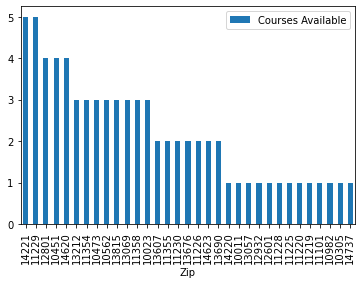

In [5]:
from datetime import timedelta

# Copiem el dataframe
df_q5: pd.DataFrame = copy.deepcopy(df_data_copy)

# seleccionem els últims 5 dies
data_max: int = df_q5['Last Report Date'].max()
dia_ult_5dies = data_max.strftime("%d")
dia_number = pd.to_numeric(dia_ult_5dies) - 2
comparator_date = data_max.strftime(f"%Y-%m-{dia_number} %H:%M:%S")

mask_5dias = (df_q5['Last Report Date'] >= comparator_date)

df_q5 = df_q5.loc[mask_5dias]


# agrupar per zip
df_q5_plot = pd.DataFrame = df_q5.loc[:, ["Zip", "Courses Available"]] \
.groupby("Zip") \
.count() \
.sort_values(by="Courses Available", ascending=False) 

display(df_q5_plot)

df_q5_plot.plot(kind="bar")

Conclusions Pregunta 5. Podem observar al gràfic que els codis postals "14221" i "11229" són els que tenen més cursos disponibles, 5 cursos disponibles.

## Pregunta 6) Consulta que crei almenys una columna calculada.


Consulta que crei almenys una columna calculada.
1. És a dir, que la consulta crei un nou camp depenent d’un altre camp, o calculat a partir
d’altres columnes.
2. Exemples:
a) camp Apte/NoApte depenent de les notes d’alumnes
b) càlcul imc a partir del pes i l’alçada.
3. Resultat final, Jupyter Notebook o projecte Python amb el codi

In [6]:
# Copiem el dataframe
df_q6: pd.DataFrame = copy.deepcopy(df_data)

# Si n'hi més de 20 cursos disponibles, retorna un missatge de "Molts cursos disponibles", si n'hi ha menys o igual a 20, retorna un missatge de "Pocs cursos disponibles".
df_q6['Disponibilitat cursos'] = ["Pocs cursos disponibles" if cursos <=20 else "Molts cursos disponibles" for cursos in df_q6['Courses Available']] 
df_q6


,Provider Name,Address1,Address2,City,County,State Code,Zip,National Drug Code,Order Label,Courses Available,Geocoded Address,NPI,Last Report Date,Provider Status,Provider Note,Disponibilitat cursos
0,Avalon Pharmacy,7 Second Ave,NaN,New York,New York,NY,10003,00069-1085-30,Paxlovid,52.0,POINT (-73.9913 40.72403),1.629306e+09,2022-04-10,ACTIVE,NaN,Molts cursos disponibles
1,PLUS DRUGS INC,209-31 Northern Blvd,NaN,Bayside,Queens,NY,11361,00069-1085-30,Paxlovid,29.0,POINT (-73.77338 40.75943),1.861843e+09,2022-10-14,ACTIVE,NaN,Molts cursos disponibles
2,ACME,3101 ROUTE 22,NaN,Patterson,Putnam,NY,12563,00069-1085-30,Paxlovid,6.0,POINT (-73.591667 41.51687),1.376900e+09,2022-10-16,ACTIVE,NaN,Pocs cursos disponibles
3,TAP RX,111 EXECUTIVE BLVD,NaN,Farmingdale,Nassau,NY,11735,00069-1085-30,Paxlovid,121.0,POINT (-73.428406 40.72173),1.710006e+09,2022-10-14,ACTIVE,NaN,Molts cursos disponibles
4,Rite Aid 10804,12983 MAIN ROAD,NaN,Akron,Erie,NY,14001,00069-1085-30,Paxlovid,41.0,POINT (-78.50282 42.99713),1.851490e+09,2022-10-13,ACTIVE,NaN,Molts cursos disponibles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,WALGREENS STORE #14327,1675 3RD AVE,NaN,New York,New York,NY,10128,00006-5055-06,Lagevrio (molnupiravir),23.0,POINT (-73.95038 40.78341),1.497772e+09,2022-10-13,ACTIVE,NaN,Molts cursos disponibles
5590,CVS Store #07032,450 MAIN STREET,CVS Pharmacy,Armonk,Westchester,NY,10504,00006-5055-06,Lagevrio (molnupiravir),51.0,POINT (-73.712652 41.12754),1.942619e+09,2022-10-14,ACTIVE,NaN,Molts cursos disponibles
5591,CVS Store #02438,282 EAST 149TH STREET,CVS Pharmacy,Bronx,Bronx,NY,10451,00006-5055-06,Lagevrio (molnupiravir),13.0,POINT (-73.922245 40.816965),1.588768e+09,2022-10-14,ACTIVE,NaN,Pocs cursos disponibles
5592,Stop and Shop Store # 2581,156-01 CROSSBAY BLVD,NaN,Howard Beach,Queens,NY,11414,00006-5055-06,Lagevrio (molnupiravir),48.0,POINT (-73.84033 40.66281),1.063882e+09,2022-10-13,ACTIVE,NaN,Molts cursos disponibles


 ## Pregunta 7 - Consulta amb dades agrupades per un camp de tipus categòric.

1. Si no teniu un camp que es pugui convertir a tipus categòric, haureu de crear-ne un.
2. També heu de mostrar un gràfic de totes les categories.

Order Label
Lagevrio (molnupiravir)    1696
Renal Paxlovid             1686
Paxlovid                   2039
Evusheld                     92
Bebtelovimab                 81
Sotrovimab                    0
Name: Order Label, dtype: int64
Provider Name                 object
Address1                      object
City                          object
County                        object
State Code                    object
Zip                            int64
National Drug Code            object
Order Label                 category
Courses Available              int64
Geocoded Address              object
NPI                          float64
Last Report Date      datetime64[ns]
Provider Status               object
Provider Note                 object
dtype: object


None

<AxesSubplot:xlabel='Order Label', ylabel='Count'>

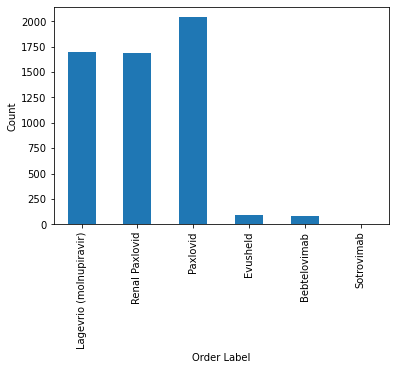

In [7]:
# Copiem el dataframe
df_q7 = copy.deepcopy(df_data_copy)

# 1 - Definim l'ordre i els valors dels categòrics.
therapeutic_labels = ['Lagevrio (molnupiravir)','Renal Paxlovid','Paxlovid','Evusheld','Bebtelovimab','Sotrovimab']

# 2 - Convertir a Category dtype
df_q7.loc[:, "Order Label"] = df_q7.loc[:, "Order Label"].astype("category")

# 3 - Assignar el valor de la categoria.
df_q7.loc[:, "Order Label"] = df_q7.loc[:, "Order Label"].cat.set_categories(therapeutic_labels)

print(df_q7.groupby('Order Label')['Order Label'].count())

# 4 - Provem que funciona
print(df_q7.dtypes)

display(df_q7.sort_values(by=["Order Label"],ascending=True,inplace=True))

# Per a crear un gràfic de categories, l'hem convertit en una sèrie (value_counts).
df_q7['Order Label'].value_counts().sort_index().plot(kind='bar', xlabel='Order Label', ylabel='Count')


Conclusió Pregunta 7:

Analitzant el gràfic, podem veure n'hi ha més teràpeutics de Paxlovid, i els que menys o cap és el de Sotrovimab.

### Pregunta 8) Consulta amb dades agrupades per data.
1. És a dir, que si les dades no estan agrupades les haureu d’agrupar per data; ja sigui per
any, per mes o per dia.
2. També heu de mostrar un gràfic.
3. Resultat final, Jupyter Notebook o projecte Python amb el codi i el gràfic.

,Courses Available
Last Report Date,
2022-12-10,4
2022-12-07,1
2022-11-10,4
2022-10-16,3
2022-10-15,7
2022-10-14,202
2022-10-13,331
2022-10-10,7
2022-09-30,4


<AxesSubplot:xlabel='Last Report Date'>

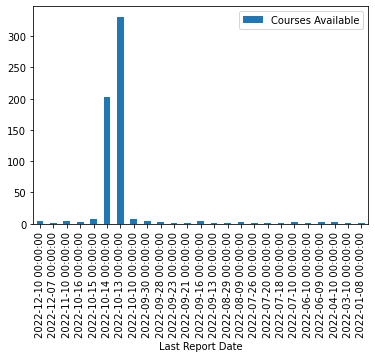

In [8]:
# Copiem el dataframe
df_q8: pd.DataFrame = copy.deepcopy(df_data)

# Filtrem per ciudad New York
mask_question8 = (df_q8['City'] == 'New York')
df_q8 = df_q8.loc[mask_question8]

# Drop the columns y inplace per guardar els canvis
df_q8.drop(columns=['City'],inplace=True)

# Per a fer el gràfic, necessitarem només les columnes de "Last Report Date" i "Courses Available":
df_q8_plot = pd.DataFrame = df_q8.loc[:, ["Last Report Date", "Courses Available"]].groupby("Last Report Date").count().sort_values(by='Last Report Date', ascending=False)

# Display the result
display(df_q8_plot)

# Gràficn dels cursos disponibles segons la data a la ciutat de New York
df_q8_plot.plot(kind="bar")

Conclusió Pregunta 8:
Com podem veure al gràfic, a meitat del més d'Octubre, concretament el 13 i 14 d'octubre és quan n'hi ha més cursos disponibles a la ciutat de New York.

### Pregunta 9) Separació i fusió de datasets.

Pregunta 9) Separació i fusió de datasets.

1. Tria una de les 2 operacions:

    a) Fes una còpia del dataSet, aconsegueix crear 2 dataSet amb camps i files separats
però que comparteixin un camp comú, i després fes el merge.

    b) Si el teu dataSet està desactualitzat o falten dades d'alguns anys i les trobes dades per altres fonts, crea un nou conjunt de dades amb algunes files i/o alguna columna nova.

Finalment, fes el merge.

In [9]:
# Imports
from datetime import timedelta
from operator import index
df_q9: pd.DataFrame = copy.deepcopy(df_data_copy)

# seleccionem els últims 5 dies
data_max: int = df_q9['Last Report Date'].max()

print(dia_ult_5dies)
mounth_number = 6

comparator_date = data_max.strftime(f"%Y-{mounth_number}-%d %H:%M:%S")

df_q9_mask_greater6 = df_q9['Last Report Date'] >= comparator_date
df_q9_mask_less6 = df_q9['Last Report Date'] < comparator_date

df_q9_1 = df_q9.loc[df_q9_mask_less6,['Provider Name', 'Order Label', 'Courses Available','Last Report Date','State Code']]
df_q9_2 = df_q9.loc[df_q9_mask_greater6,['Provider Name', 'State Code', 'Order Label', 'Courses Available','Last Report Date']]

#df_q9_merge = df_q9_1.merge( df_q9_2er by= 'State Code', all=True)
df_q9_merge = pd.merge(df_q9_1, df_q9_2, on=['State Code','Provider Name','Order Label','Courses Available','Last Report Date'], how='outer', indicator=True)

# Display
display(df_q9_merge)

10


,Provider Name,Order Label,Courses Available,Last Report Date,State Code,_merge
0,Avalon Pharmacy,Paxlovid,52,2022-04-10,NY,left_only
1,ROSWELL PARK CANCER INSTITUTE,Bebtelovimab,26,2022-03-10,NY,left_only
2,Wellming Pharmacy,Paxlovid,20,2022-04-10,NY,left_only
3,FOREVER PHARMACY INC,Paxlovid,4,2022-04-10,NY,left_only
4,Farmacia Central,Paxlovid,16,2022-04-10,NY,left_only
...,...,...,...,...,...,...
5584,WALGREENS STORE #14327,Lagevrio (molnupiravir),23,2022-10-13,NY,right_only
5585,CVS Store #07032,Lagevrio (molnupiravir),51,2022-10-14,NY,right_only
5586,CVS Store #02438,Lagevrio (molnupiravir),13,2022-10-14,NY,right_only
5587,Stop and Shop Store # 2581,Lagevrio (molnupiravir),48,2022-10-13,NY,right_only
